## <span style='color:brown'>generate cont. data<span style='color:brown'>

### &emsp;&emsp; * <span style='color:white'>fun<span style='color:white'>

In [1]:
### df an plot
def generate_3_dim_df(x,y,z, tp):
    x_axis=[]
    y_axis=[]
    z_axis=[]
    the = []
    sca = []
    tps = []
    # data_type = []
    for i in range(0, x.shape[0]):
        x_axis.append(x[i])
        y_axis.append(y[i])
        z_axis.append(z[i])
        tps.append(tp)
    list_of_tuples = list(zip(x_axis, y_axis, z_axis,tps))
    df = pd.DataFrame(list_of_tuples,
                    columns = ['x', 'y', 'z','GB'])
    return df

def plot_3d_df(df):
    data = [go.Scatter3d(x=df[df.columns[0]], y=df[df.columns[1]], z=df[df.columns[2]],mode='markers', marker=dict(size=3, color = "red", opacity=0.6), showlegend=True, name = "")]
    fig = go.Figure(data)
    # fig = go.Figure(data=data)
    fig.update_layout(title_text=" " , title_x=0.5)
    fig.update_layout( xaxis =  {'showgrid': False},yaxis = {'showgrid': True}, title_text=f'Scatter Plot <br><sup>{df_name}</sup> ',)
    
    # fig.show()
    return fig

def plot_3d_df_new(df):
    df1 = df.loc[df[df.columns[-1]] == 1]
    df0 = df.loc[df[df.columns[-1]] == 0]
    GB_1 = [go.Scatter3d(x=df1[df.columns[0]], y=df1[df.columns[1]], z=df1[df.columns[2]],mode='markers', marker=dict(size=3, color = "red", opacity=0.6), showlegend=True, name = "GB_1")]
    GB_0 = [go.Scatter3d(x=df0[df.columns[0]], y=df0[df.columns[1]], z=df0[df.columns[2]],mode='markers', marker=dict(size=3, color = "blue", opacity=0.6), showlegend=True, name = "GB_0")]
    
    fig = go.Figure(GB_1 + GB_0)
    # fig = go.Figure(data=data)
    fig.update_layout(title_text=" " , title_x=0.5)
    fig.update_layout( xaxis =  {'showgrid': False},yaxis = {'showgrid': True}, title_text=f' Scatter Plot <br><sup>{df_name}</sup> ',)
    # fig.show()
    return fig

def plot_3d_df_UI(df1, df0 , w, h):
    GB_1 = [go.Scatter3d(x=df1[df1.columns[0]], y=df1[df1.columns[1]], z=df1[df1.columns[2]],mode='markers', marker=dict(size=3, color = "red", opacity=0.6), showlegend=True, name = "GB_1")]
    GB_0 = [go.Scatter3d(x=df0[df0.columns[0]], y=df0[df0.columns[1]], z=df0[df0.columns[2]],mode='markers', marker=dict(size=3, color = df0.GB, colorscale='Bluered', opacity=0.6), showlegend=True, name = "GB_0")]
    fig = go.FigureWidget(GB_0 + GB_1)
    fig.update_layout(title_text=" " , title_x=0.5)
    fig.update_layout( xaxis =  {'showgrid': False},yaxis = {'showgrid': True}, title_text=f' Scatter Plot <br><sup>{df_name}</sup> ', width=w,height=h,)
    return fig

def plot_3d_df_all(df_read_data, df_new_data):
    df_read, df_new = df_read_data.copy(), df_new_data.copy()
    df_dict = {'Original cont.':df_read, 'encoded':df_new} 
    dict_key = list(df_dict.keys())
    
    fig = make_subplots(rows=1, cols=2,subplot_titles=(dict_key),specs=[[{'type': 'surface'}, {'type': 'surface'}]],)
    for k in range (0, len(dict_key)):  
        df = df_dict[dict_key[k]]
        df1 = df.loc[df[df.columns[-1]] == 1]
        df0 = df.loc[df[df.columns[-1]] == 0]
        GB_1 = go.Scatter3d(x=df1[df.columns[0]], y=df1[df.columns[1]], z=df1[df.columns[2]],mode='markers', marker=dict(size=3, color = "red", opacity=1), showlegend=True, name = "GB_1")#,legendgroup=k,)
        GB_0 = go.Scatter3d(x=df0[df.columns[0]], y=df0[df.columns[1]], z=df0[df.columns[2]],mode='markers', marker=dict(size=3, color = "blue", opacity=0.5), showlegend=True, name = "GB_0")#,legendgroup=k,)
        # fig = go.Figure(GB_1 + GB_0)
        fig.add_trace(GB_1,row=1, col=k+1)
        fig.add_trace(GB_0,row=1, col=k+1)
        # fig.add_trace([GB_1 + GB_0],row=1, col=k+1)
    fig.update_layout(title_text=" " , title_x=0.5)
    fig.update_layout( xaxis =  {'showgrid': False},yaxis = {'showgrid': True}, title_text=f' Scatter Plot <br><sup>{df_name}</sup> ',)
    return fig

In [2]:
### UI
def rb_axis_selection(sender): 
    global axis, remain_axies
    axis = rb_axis.value
    sd_off.value = cur_off[num_df][axis]
    sd_str.value = cur_str[num_df][axis]
    sd_rot.value = cur_the[num_df][axis]
    
    remain_axies = []
    remain_axies = df.columns[:3].tolist()
    remain_axies.remove(axis)
    
def rb_dataframe_selection(sender): 
    global df, num_df
    tp = rb_group.value
    if tp == 'majority': 
        df = df_0
        num_df = 0
    elif tp == 'minority':
        df = df_1
        num_df = 1
    sd_off.value = cur_off[num_df][axis]
    sd_str.value = cur_str[num_df][axis]
    sd_rot.value = cur_the[num_df][axis]

def update_offset(offset):
    global cur_off
    with fig.batch_update():
        fig.data[num_df][axis] = fig.data[num_df][axis] + (offset['new'] - cur_off[num_df][axis])
        cur_off[num_df][axis] = offset['new']
        
def update_scale(stretch):
    global cur_str
    with fig.batch_update():
        fig.data[num_df][axis] = (fig.data[num_df][axis] - np.mean(fig.data[num_df][axis]))* (stretch['new']/cur_str[num_df][axis]) + np.mean(fig.data[num_df][axis])
        cur_str[num_df][axis] = stretch['new']
        
def update_rotate(rotate):
    global cur_the
    with fig.batch_update():    
        theta = (np.pi/180) * (rotate['new'] - cur_the[num_df][axis])
        rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                               [np.sin(theta), np.cos(theta)]])    
        x_old, y_old = fig.data[num_df][remain_axies[0]], fig.data[num_df][remain_axies[1]]
        x_new, y_new = rot_matrix @ [x_old - np.mean(x_old), y_old- np.mean(y_old)]
        fig.data[num_df][remain_axies[0]], fig.data[num_df][remain_axies[1]] = x_new+np.mean(x_old), y_new+np.mean(y_old)
        cur_the[num_df][axis] = rotate['new']



In [3]:
cur_the = [{'x':0, 'y':0,'z':0,},{'x':0, 'y':0,'z':0,}]
cur_off = [{'x':0, 'y':0,'z':0,},{'x':0, 'y':0,'z':0,}]
cur_str = [{'x':1, 'y':1,'z':1,},{'x':1, 'y':1,'z':1,}]
intval = 5
remain_axies = ['y','z']

rb_group = widgets.RadioButtons(
    options=['majority', 'minority'],
    layout={'width': 'max-content'},
)

rb_axis = widgets.RadioButtons(
    options=['x', 'y', 'z'],
    layout={'width': 'max-content'},
)

sd_off = widgets.FloatSlider(value = 0, min = -10, max = 10, step = 0.01, description='offest')
sd_str = widgets.FloatSlider(value = 1, min = 0.01, max = 5, step = 0.01, description='stretch')
sd_rot = widgets.FloatSlider(value = 0, min = 0, max = 360, step = 1,description='rotate')
vb_morph = VBox([Button(description="Morph"),sd_off,sd_str,sd_rot])


rb_group.observe(rb_dataframe_selection, names=['value'])
rb_axis.observe(rb_axis_selection, names=['value'])
        
sd_off.observe(update_offset, names='value')
sd_str.observe(update_scale, names='value')
sd_rot.observe(update_rotate, names='value')

NameError: name 'widgets' is not defined

In [4]:
def slice_cont_to_bin(df_read, sliced_part):
    df = df_read.iloc[:,:-1]
    new_data = []
    gap = [0]
    n_feat = 0
    label_encoder = LabelEncoder()
    # finding slicing gap
    for c in df.columns:
        mx = int(max(df[c]))+1
        mn = int(min(df[c]))-1
        n_bins = sliced_part
        n_feat = n_feat+n_bins
        gap.append(n_feat)
        y = label_encoder.fit_transform(pd.cut(df[c], n_bins, retbins=True)[0])
        new_data.append(list(y))
    df_new = pd.DataFrame(new_data)

    # changing data gird in to binary
    df = df_new.T
    new_data = []
    for r in df.values:
        l_1 = []
        nr_data = []
        for i in range(0,len(gap)-1):      
            l_1.append( gap[i]+r[i])
        for i in range(0,gap[-1]): 
            if i in l_1:
                nr_data.append(1)
            else:
                nr_data.append(0)
        new_data.append(nr_data)
    new_data

    # adding feature name
    n_f_name = []
    cur = 0
    s = 96
    for i in range(0,gap[-1]):
        if i >= gap[cur]:
            cur = cur + 1
            s = s+1
        n_f_name.append(f"{chr(s)}-{i-gap[cur-1]}")
        
    # generating new binary data
    df_new = pd.DataFrame(new_data)
    df_bin = df_new
    df_bin.columns = n_f_name
    df_bin['GB'] = df_read.iloc[:,-1:]
    return df_bin

### &emsp;| (1) df gnerate

In [5]:
# settings
# df_name = " "
num_of_pt = 3030
num_of_noise = 30
x_mu, x_sig = 0,0.5
y_mu, y_sig = 0,0.5
z_mu, z_sig = 0,0.5
x = np.random.normal(x_mu, x_sig, num_of_pt)
y = np.random.normal(y_mu, y_sig, num_of_pt)
z = np.random.normal(z_mu, z_sig, num_of_pt)

df_0 = generate_3_dim_df(x,y,z, 0)

NameError: name 'np' is not defined

In [165]:
# noise
random.seed(1224)
noise = random.choices(df_0.index, k=num_of_noise)
df_0.at[noise,"GB"] = 1
# print(noise)

In [166]:
num_of_pt = 270
x_mu, x_sig = 0,0.1
y_mu, y_sig = 0,0.1
z_mu, z_sig = 0,0.1
x = np.random.normal(x_mu, x_sig, num_of_pt)
y = np.random.normal(y_mu, y_sig, num_of_pt)
z = np.random.normal(z_mu, z_sig, num_of_pt)

df_1 = generate_3_dim_df(x,y,z, 1)

### &emsp;| (2) UI setting

In [167]:
df = df_0
num_df = 0
axis = 'x'    
shp_name = "shape 5"
df_name = f"Data generation / {shp_name} "
fig = plot_3d_df_UI(df_1,df_0 , 1200,600)

### &emsp;| (3) adjusting

In [168]:
left_box = VBox([Button(description="Group"), rb_group])
center_box = VBox([Button(description="Axis"), rb_axis])
right_box = vb_morph
display(HBox([left_box, center_box, vb_morph]))
fig

FigureWidget({
    'data': [{'marker': {'color': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
                …

### &emsp;| (4) output df cont.

In [169]:
out_put_df = True

In [170]:
df_new_0 = pd.DataFrame()
df_new_0['x'] = fig.data[0].x.tolist()
df_new_0['y'] = fig.data[0].y.tolist()
df_new_0['z'] = fig.data[0].z.tolist()
df_new_0['GB'] = df_0.GB

df_new_1 = pd.DataFrame()
df_new_1['x'] = fig.data[1].x.tolist()
df_new_1['y'] = fig.data[1].y.tolist()
df_new_1['z'] = fig.data[1].z.tolist()
df_new_1['GB'] = df_1.GB

df_r = pd.concat([df_new_0,df_new_1],axis=0)
df_r.reset_index(inplace=True, drop=True)

path  = r"C:\Users\User\Desktop\Terry\Data\Output\oval shape data"
if out_put_df:
    df_r.to_csv(f"{path}/{shp_name}.csv")

### &emsp;| (5) slicing to binary 

In [139]:
sd_sp = widgets.IntSlider(value = 3, min = 0, max = 150, step = 3,description='')
VBox([Button(description="slicing parts"), sd_sp])

In [140]:
n_bin_col = sd_sp.value
df_b = slice_cont_to_bin(df_r, n_bin_col)
df_b.head()

a-0  b-0  c-0  GB
0    1    1    1   0
1    1    1    1   0
2    1    1    1   0
3    1    1    1   0
4    1    1    1   0

## <span style='color:DarkOliveGreen'>generate MLP data<span style='color:DarkOliveGreen'>

### &emsp;&emsp; * <span style='color:white'>fun<span style='color:white'>

In [254]:
# fuzzy set pdf
def pdf_tri(l_x, peck, h):
    xp = l_x.index(peck)
    if xp == 0:climb = 0
    else:climb = h/xp
    desent = h/(len(l_x)-xp)
    y_out = []
    for i, x in enumerate(l_x):
        if x <= peck:
            y_out.append(climb*i)
        elif x > peck:
            y_out.append(h-desent*(i-xp))
    return y_out

def pdf_trap(l_x, p0,p1, h):
    xp0 = l_x.index(p0)
    xp1 = l_x.index(p1)
    if xp0 == 0:climb = 0
    else:climb = h/xp0
    
    desent = h/(len(l_x)-xp1)
    y_out = []
    for i, x in enumerate(l_x):
        if x <= p0:
            y_out.append(climb*i)
        elif p0 < x <= p1:
            y_out.append(h)
        elif p1 < x:
            y_out.append(h-desent*(i-xp1))
    return y_out

def cal_bins(step, range_x):
    fractional, whole = math.modf(step)
    round_to = len(str(fractional))-2
    
    bins = (range_x[1]-range_x[0])/step
    x = []
    for i in np.arange(range_x[0],range_x[1]+step,step):
        x.append(round(i, round_to))
    return x

def fuzzy_plot(gb1_xy, gb0_xy):
    gb_1 = go.Bar(x=gb1_xy[0], y=gb1_xy[1], name = "Bad (GB=1)",marker=dict(color =  "red", opacity=0.3))
    gb_0 = go.Bar(x=gb0_xy[0], y=gb0_xy[1], name = "Good (GB=0)",marker=dict(color = "blue", opacity=0.3))
    Data = [gb_1,gb_0]
    total_area = 0
    sum_y = []
    for i in np.arange(0,10+step, step):
        for t in Data:
            if i in t['x']:
                total_area = total_area + t['y'][t['x'].index(i)]
        sum_y.append(total_area)

    cum = go.Scatter(x=[i for i in np.arange(0,10+step, step)], y=[s/total_area for s in sum_y], name="Cumulative area",
                     line = dict(color='olivedrab', width=3),  fill='tozeroy')#,  mode= 'none')
    # fig = go.FigureWidget()
    fig = go.FigureWidget(make_subplots(specs=[[{"secondary_y": True}]]))

    fig.add_trace(gb_1,secondary_y=False )
    fig.add_trace(gb_0,secondary_y= False)
    fig.add_trace(cum,secondary_y=True)

    # Set axis title
    fig.update_xaxes(title_text="<b>product quality Θ </b>", range = [0,10])
    fig.update_yaxes(visible=True, title_text="<b>membership μ(x)</b>", secondary_y=True)
    fig.update_yaxes(visible=False, secondary_y=False)
    fig.update_layout(title = "product quality fuzzy graph", width = 1000, height = 1000, barmode='group', 
                      bargap=0.0,bargroupgap=0.0,
                      legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01))
    return fig

In [255]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    return plt
def change_to_one_zero(x, per):
# per_ratio = 0.1
    y = []
    for o in (x):
        if o > sorted(x)[int(per*len(x))]: y.append(0)
        else: y.append(1)
    return y

### &emsp;| (1) fuzzy diagram

In [256]:
# calculation
step = 0.01
fractional, whole = math.modf(step)
round_to = len(str(fractional))-2

# gb1
# r_x = [0,3]
# x_1 = cal_bins(step, r_x)
# y_1 = pdf_tri(x_1,3,2/3)
# gb1_xy = [x_1,y_1]

# # gb1
r_x = [0,4]
x_1 = cal_bins(step, r_x)
y_1 = pdf_tri(x_1,0,1.5)
gb1_xy = [x_1,y_1]

# gb0
r_x = [4,10]
x_0 = cal_bins(step, r_x)
y_0 = pdf_trap(x_0,7,10,2)
gb0_xy = [x_0,y_0]

In [257]:
fig = fuzzy_plot(gb1_xy, gb0_xy)
fig

FigureWidget({
    'data': [{'marker': {'color': 'red', 'opacity': 0.3},
              'name': 'Bad (GB=1)',
 …

### &emsp;| (2) generate product df

In [12]:
cut = 3
n_samples = 3000
seed = 1224
cum_area = fig.data[-1]

In [13]:
quality_cut = cum_area.y[cum_area.x.index(cut)]
random.seed(seed)
l_q = []
l_pro = []
l_type = []
for i in range(0,n_samples):
    q = random.uniform(0, 1)
    # print(round(q, round_to))
    l_pro.append(q)
    l_q.append(fig.data[-1].y[fig.data[-1].x.index(cut)])
    if q<quality_cut:
        l_type.append(1)
    else :
        l_type.append(0)

In [14]:
df = pd.DataFrame()
df['quality_percentage'] = l_pro
df['GB'] = l_type
df

quality_percentage  GB
0               0.103809   1
1               0.709013   0
2               0.382034   0
3               0.803716   0
4               0.429144   0
...                  ...  ..
2995            0.571734   0
2996            0.469251   0
2997            0.789032   0
2998            0.225074   0
2999            0.249398   0

[3000 rows x 2 columns]

### &emsp;| (3) build and train MLP

In [142]:
sd_sp = widgets.IntSlider(value = 3, min = 0, max = 150, step = 3,description='')
VBox([Button(description="slicing parts"), sd_sp])

In [143]:
n_bin_col = sd_sp.value

input_shape = 1
bin_col_layer = 2
x = df.iloc[:,0].values
y = df.iloc[:,-1].values

NameError: name 'df' is not defined

In [17]:
model = Sequential()
# model.add(Dense(units = int(n_bin_col/3), input_dim=input_shape,kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(units = int(n_bin_col/2), input_dim=input_shape,kernel_initializer = "uniform", activation = "sigmoid"))
model.add(Dense(units = n_bin_col,kernel_initializer = "uniform", activation = "sigmoid"))
# model.add(Dense(units = n_bin_col,kernel_initializer = "uniform", activation = "custom_activation"))
model.add(Dense(units = int(n_bin_col/2),kernel_initializer = "uniform", activation = "sigmoid"))
# model.add(Dense(units = int(n_bin_col/3), input_dim=input_shape,kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(units = 1,kernel_initializer = "uniform", activation = "sigmoid"))

In [18]:
model.compile(loss="binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])#, run_eagerly=False,)

In [19]:
train_hist = model.fit(x = x, y = y, epochs = 100, batch_size = 30, validation_split=0.1, verbose=0)

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

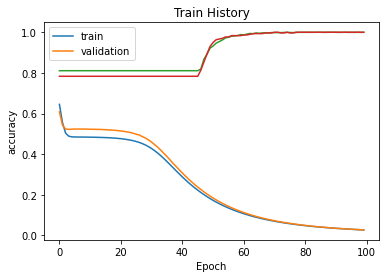

In [20]:
show_train_history(train_hist,'loss','val_loss')
show_train_history(train_hist,'accuracy','val_accuracy')

### &emsp;| (4) output df_bin

In [19]:
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

bin_data = []
for r in x:
    layer_outs = [func([np.array([[r]])]) for func in functors]
    for i,l in enumerate (layer_outs):
        for n in l:
            l_f = [s for xs in n.tolist() for s in xs]
            if i == bin_col_layer-1: bin_data.append(change_to_one_zero(l_f,0.2))

In [20]:
df_b = pd.DataFrame(bin_data)
df_b["GB"] = y
df_b

0  1  2  3  4  5  6  7  8  9  GB
0     0  0  1  0  0  0  1  0  1  0   1
1     1  1  0  1  0  0  0  0  0  0   0
2     1  1  0  1  0  0  0  0  0  0   0
3     1  1  0  1  0  0  0  0  0  0   0
4     1  1  0  1  0  0  0  0  0  0   0
...  .. .. .. .. .. .. .. .. .. ..  ..
2995  1  1  0  1  0  0  0  0  0  0   0
2996  1  1  0  1  0  0  0  0  0  0   0
2997  1  1  0  1  0  0  0  0  0  0   0
2998  1  1  0  1  0  0  0  0  0  0   0
2999  1  1  0  1  0  0  0  0  0  0   0

[3000 rows x 11 columns]

In [21]:
df_b.iloc[:,:n_bin_col].drop_duplicates().shape

(5, 10)

### &emsp;| (5) model vis

In [21]:
### important
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

In [22]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, title="Artificial Neural network - Model Visualization")

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
from keras.utils.vis_utils import plot_model
keras.utils.vis_utils.plot_model(model,to_file='model.png',)

## <span style='color:Orange'>generate rnd binary data<span style='color:Orange'>

In [27]:
num_of_points =3000
type_one_ratio = 0.1
num_of_col = 33

In [28]:
categorical_data = [random.randint(0, 2**num_of_col) for _ in range(num_of_points)]
bin_data = ["{0:b}".format(xs) for xs in categorical_data]
col_gb = [1]*int(num_of_points*type_one_ratio)+[0]*int(num_of_points*(1-type_one_ratio))

In [29]:
new_data = []
for b in bin_data:
    while len(b)!=num_of_col: b="0"+b
    new_data.append([int(bi) for bi in b])
df_bin = pd.DataFrame(new_data)
df_bin["GB"] = col_gb
df_bin

0  1  2  3  4  5  6  7  8  9  ...  24  25  26  27  28  29  30  31  32  \
0     0  0  1  0  0  1  0  1  1  0  ...   1   1   1   0   1   0   1   0   0   
1     1  0  1  1  1  0  0  1  1  1  ...   1   0   0   1   1   0   0   0   0   
2     1  0  1  0  0  1  0  0  1  0  ...   1   1   1   1   0   0   0   1   0   
3     0  0  0  0  0  0  1  1  0  0  ...   1   1   0   0   1   1   0   0   0   
4     0  1  0  1  0  1  0  0  1  0  ...   1   0   0   1   0   1   0   1   1   
...  .. .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
2995  1  1  0  1  1  1  1  1  0  0  ...   1   0   0   0   0   1   0   1   0   
2996  0  0  1  1  0  0  1  1  1  1  ...   0   0   1   1   0   1   0   1   0   
2997  1  0  1  0  0  1  1  0  0  0  ...   1   1   0   1   0   0   1   0   1   
2998  0  1  1  0  0  0  1  1  1  1  ...   0   1   1   0   0   1   0   0   1   
2999  0  0  1  0  1  0  0  0  0  1  ...   0   1   1   1   1   0   0   1   1   

      GB  
0      1  
1      1  
2      1  
3      1  
4      1  
...   ..  
2995   0  
2996   0  
2997   0  
2998   0  
2999   0  

[3000 rows x 34 columns]

In [194]:
int('100101', 2)

37

In [200]:
"{0:b}".format(37)

'100101'

## <span style='color:red'>others <span style='color:red'>

### import package
___

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], [
                tf.config.experimental.VirtualDeviceConfiguration(
                    memory_limit=5120)
            ])
    except RuntimeError as e:
        print(e)

import ipywidgets as widgets
from ipywidgets import VBox, HBox, Label, Button
from ipywidgets import IntSlider
from ipywidgets import interact

import numpy as np
import pandas as pd

import os
from os import listdir
from os.path import isfile, join

import random
import math

import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

import category_encoders as ce

import warnings

warnings.filterwarnings("ignore")

In [53]:
import numpy as np 
import pandas as pd
from sklearn import manifold, datasets
import random
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
import imblearn
from imblearn.under_sampling import RandomUnderSampler 
import plotly.express as px
import plotly
import plotly.graph_objs as go
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

### function
---

#### > plot

In [3]:
from matplotlib import pyplot as plt
def plot_col_distri(df, h,w):
    fig,ax=plt.subplots(h,w, figsize=(h*8,w*8))
    cm = plt.cm.get_cmap('brg')
    x = 0
    for i in range(0, len(df.columns)):
        # sns.countplot(x=df[i] , ax=ax[int(i/w), i%w])
        n, bins, patches = ax[int(i/w), i%w].hist(df[df.columns[i]], color='green')
        ax[int(i/w), i%w].set_title(df.columns[i])
        
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        col = bin_centers - min(bin_centers)
        col /= max(col)
        for c, p in zip(col, patches):
            plt.setp(p, 'facecolor', cm(c))
            
        x = x+1
    plt.suptitle(f"{df_name} column distribution", fontsize=30, y = 0.95)
    return plt

In [4]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

def plot_cate_dis(df):
    x0 = df[df[df.columns[-1]]=="0-0"].iloc[:,0].values
    x1 = df[df[df.columns[-1]]=="0-1"].iloc[:,0].values
    x2 = df[df[df.columns[-1]]=="1-1"].iloc[:,0].values

    fig = go.Figure()
    fig.add_trace(go.Histogram(x=x0, name = "0-0"))
    fig.add_trace(go.Histogram(x=x1, name = "0-1"))
    fig.add_trace(go.Histogram(x=x2, name = "1-1"))
    # The two histograms are drawn on top of another
    fig.update_layout(barmode='stack',title_text=f'Distance Categories  <br><sup>{df_name}</sup> ',)
    # fig.show()
    
    return fig

def plot_dis(df_dis, bins, tp):
    # plot_dis(dis)
    c = None
    if tp == "SL":
        c = "indianred"
    elif tp == "LS":
        c = "hsl(120, 20%, 50%)"
    
    df_dis.columns = ["euclidean distance"]
    fig = px.histogram(df_dis, x=df_dis.columns[0], nbins=100,width=800, height=500,title=df_name, color_discrete_sequence =[c])
    # fig.show()
    return fig

def plot_all_dis(df_dis,df_dis_SL,df_dis_LS, bins):
 
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df_dis, name='Bin',marker_color=None,))
    fig.add_trace(go.Histogram(x=df_dis_SL, name='SL',marker_color="indianred",))
    fig.add_trace(go.Histogram(x=df_dis_LS, name='LS',marker_color="hsl(120, 20%, 50%)",))

    # Overlay both histograms
    fig.update_layout(
        barmode='overlay',
        title_text=f'Distance Distribution  <br><sup>{df_name}</sup> ', # title of plot
        xaxis_title_text="euclidean distance", # xaxis label
        yaxis_title_text="Count", # yaxis label
    
    )
    # Reduce opacity to see both histograms
    fig.update_traces(opacity=0.75)
    
    # fig.show()
    return fig

def plot_all_dis_conti(df_dis,df_dis_SL,df_dis_LS, df_dis_conti, bins):
 
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df_dis, name='Bin',marker_color=None,))
    fig.add_trace(go.Histogram(x=df_dis_conti, name='Ori',marker_color="hsl(48, 100%, 65%)",))
    fig.add_trace(go.Histogram(x=df_dis_SL, name='SL',marker_color="indianred",))
    fig.add_trace(go.Histogram(x=df_dis_LS, name='LS',marker_color="hsl(120, 20%, 50%)",))

    # Overlay both histograms
    fig.update_layout(
        barmode='overlay',
        title_text=f'Distance Distribution  <br><sup>{df_name}</sup> ', # title of plot
        xaxis_title_text="euclidean distance", # xaxis label
        yaxis_title_text="Count", # yaxis label
    
    )
    # Reduce opacity to see both histograms
    fig.update_traces(opacity=0.75)
    
    # fig.show()
    return fig
def plot_corr_map(df, w):
    # df = px.data.gapminder()　# Data Preparation
    df_corr = df.corr() # Generate correlation matrix
    x = list(df_corr.columns)
    y = list(df_corr.index)
    z = np.array(df_corr)

    fig = ff.create_annotated_heatmap(
        z,
        x = x,
        y = y ,
        annotation_text = np.around(z, decimals=2),
        hoverinfo='z',
        hoverongaps=False,
        colorscale='Viridis',
        # reversescale=True,
        )

    fig.layout.update(
      go.Layout(
        autosize=False,
          title=df_name,
           height=w,
           width=w,
            font=dict(
              # family="Gill Sans MT",
              size = 10
            )
      )
    )
    fig['layout']['xaxis']['side'] = 'bottom'
    return fig



def plot_3d_df(df):
    GB = df.GB
    data = [go.Scatter3d(x=df[df.columns[0]], y=df[df.columns[1]], z=df[df.columns[2]],mode='markers', marker=dict(size=3, color = GB, colorscale='Bluered', opacity=0.6), showlegend=True,)]
    
    fig = go.Figure(data)

    fig = go.Figure(data=data)
    fig.update_layout(title_text=" " , title_x=0.5)
    fig.update_layout( xaxis =  {'showgrid': False},yaxis = {'showgrid': True}, title_text=f'Scatter Distribution  <br><sup>{df_name}</sup> ',)
    # fig.show()
    return fig

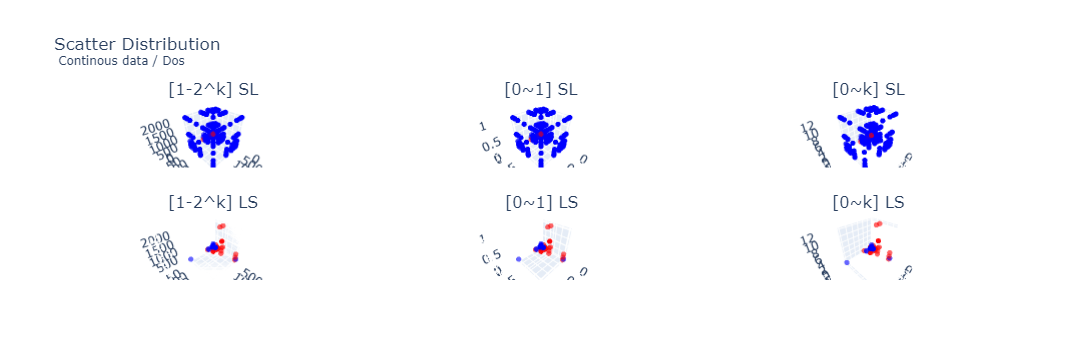

In [270]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

# Initialize figure with 4 3D subplots
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],],
    subplot_titles=(
        '[1-2^k] SL',
        '[0~1] SL',
        '[0~k] SL',
        
        '[1-2^k] LS',       
        '[0~1] LS',      
        '[0~k] LS',))

### [1~2^k]
df = df_SL
GB = df.GB
# adding surfaces to subplots.
fig.add_trace(
    go.Scatter3d(x=df[df.columns[0]], y=df[df.columns[1]], z=df[df.columns[2]],mode='markers', marker=dict(size=3, color = GB, colorscale='Bluered',), opacity=0.6,showlegend=False,),
    row=1, col=1)
    
df = df_LS
GB = df.GB
# adding surfaces to subplots.
fig.add_trace(
    go.Scatter3d(x=df[df.columns[0]], y=df[df.columns[1]], z=df[df.columns[2]],mode='markers', marker=dict(size=3, color = GB, colorscale='Bluered',), opacity=0.6,showlegend=False,),
    row=2, col=1)
    
### [0~1]
df = df_SL_01
GB = df.GB
# adding surfaces to subplots.
fig.add_trace(
    go.Scatter3d(x=df[df.columns[0]], y=df[df.columns[1]], z=df[df.columns[2]],mode='markers', marker=dict(size=3, color = GB, colorscale='Bluered',), opacity=0.6,showlegend=False,),
    row=1, col=2)
    
df = df_LS_01
GB = df.GB
# adding surfaces to subplots.
fig.add_trace(
    go.Scatter3d(x=df[df.columns[0]], y=df[df.columns[1]], z=df[df.columns[2]],mode='markers', marker=dict(size=3, color = GB, colorscale='Bluered',), opacity=0.6,showlegend=False,),
    row=2, col=2)

### [0~1k
df = df_SL_r
GB = df.GB
# adding surfaces to subplots.
fig.add_trace(
    go.Scatter3d(x=df[df.columns[0]], y=df[df.columns[1]], z=df[df.columns[2]],mode='markers', marker=dict(size=3, color = GB, colorscale='Bluered',), opacity=0.6,showlegend=False,),
    row=1, col=3)
    
df = df_LS_r
GB = df.GB
# adding surfaces to subplots.
fig.add_trace(
    go.Scatter3d(x=df[df.columns[0]], y=df[df.columns[1]], z=df[df.columns[2]],mode='markers', marker=dict(size=3, color = GB, colorscale='Bluered',), opacity=0.6,showlegend=False,),
    row=2, col=3)

fig.update_layout(
    title_text=f'Scatter Distribution  <br><sup> Continous data / Dos </sup> ',
    showlegend=True,
)

fig.show()
fig.write_html(f"{path}/comparsion, range.html")  

#### > dos

In [6]:
def arr_to_cate(array):   
    '''
    change np array to category
    '''
    for i in array:
        if i != 0 and i!=1:
            raise ValueError(f'all input needs to be 0 or 1 {array}')
    all_digit = len(array)
    category = 0
    for i in range(0,len(array)):
        category += array[i]*2**(all_digit-i-1)
    return category

def sort_arr_by_type(x, y, tp):
    '''
    arragne y by value of x
    '''
    X,Y = x,y
    for i in range(len(X)):
        if tp == "LS":
            swap = i + np.argmax(X[i:])
        elif tp == "SL": 
            swap = i + np.argmin(X[i:])
        (X[i], X[swap]) = (X[swap], X[i])
        (Y[i], Y[swap]) = (Y[swap], Y[i])
    return Y

def cal_bal_list(X):
    '''
    calculate distance ( from average to 0.5 )
    '''
    average_list = []
    balance_list = []
    for xt in X.T: 
        average_list.append(xt.sum()/len(X))
    for avg in average_list: 
        balance_list.append(abs(avg-0.5))
    return balance_list 

def get_sep_and_new_col_list(df):
    
    col = df.columns[:-1]
    pre_c = col[0][0]

    sep_list = [0]
    new_col_name = [col[0][0]]
    for i in range(0,len(col)):
        new_c = col[i][0]
        if pre_c != new_c:
            sep_list.append(i)
            new_col_name.append(new_c)
        pre_c = new_c
    sep_list.append(len(col))
    return sep_list, new_col_name

def perform_encoding(df, seq):
    new_data = []
    for r in df.values: 
        category_list = [] 
        for i in range(0, len(sep_list)-1):
            arr = []
            if seq == "SL":
                arr =   sort_arr_by_type(
                    balance_list[sep_list[i]:sep_list[i+1]], 
                    r[sep_list[i]:sep_list[i+1]],
                    seq
                    )      
            elif seq == "LS":
                arr =   sort_arr_by_type(
                    balance_list[sep_list[i]:sep_list[i+1]], 
                    r[sep_list[i]:sep_list[i+1]],
                    seq
                    )      
            category = arr_to_cate(arr)
            category_list.append(category)
        new_data.append(category_list)
        
    df_new = pd.DataFrame(new_data)
    df_new.columns = new_col_name
    df_new = df_new.set_index(df.index)
    # df_new['GB'] = df.iloc[:,-1:].values
    
    return df_new

def rerange(df, with_in_01):
    n_df =(df-df.min())/(df.max()-df.min())

    if  with_in_01==False:
        for i in range(0, len(sep_list)-1):
            g = sep_list[i+1]-sep_list[i]
            n_df.iloc[:,i] = n_df.iloc[:,i] * g

    return n_df

#### > mis

In [7]:
def corr_col_dis(df, corr_len, col_h, col_w, tp):
    get_des(df)
    fig = plot_corr_map(df,corr_len)
    fig.show()
    fig = plot_col_distri(df,col_h,col_w)
    fig.show()
    df_dis = cal_dis(df, 1000)
    fig = plot_dis(df_dis, 1000, tp)
    fig.show()

def generate_3_dim_df(xyz_array, y):
    x_axis=[]
    y_axis=[]
    z_axis=[]
    data_type = []
    for i in range(0, xyz_array.shape[0]):
        x_axis.append(xyz_array[i, 0])
        y_axis.append(xyz_array[i, 1])
        z_axis.append(xyz_array[i, 2])
        
        data_type.append(y[i])
        # if y[i] == 0:
        #     data_type.append(0)
        # else:
        #     data_type.append(1)
    list_of_tuples = list(zip(x_axis, y_axis, z_axis, data_type))
    df = pd.DataFrame(list_of_tuples,
                    columns = ['x', 'y', 'z', 'GB'])
    return df

def cal_dis(df, n, GB):   
    random.seed(seed)
    r = random.sample(range(0,len(df)), n)
    if GB:
        dfi = df.iloc[r,:-1]
    else:
        dfi = df.iloc[r,:]
    print(len(dfi.columns))
    dis = []
    for i in dfi.values:
        for j in dfi.values:
            dis.append(distance.euclidean(i, j))
    df_dis = pd.DataFrame( dis )
    return df_dis

def cal_dis_cate(df):   
    dis = []
    gb_type = []
    for i in range(0,len(df)):
        for j in range(0,len(df)):
            if j > i:
                a = df.iloc[i,:].values
                b = df.iloc[j,:].values
                dis.append(distance.euclidean(a[:-1], b[:-1]))
                # print(i, j)
                tp = None
                if a[-1] != b[-1]:
                    tp = "0-1"
                elif a[-1] == 0:
                    tp = "0-0"
                else: 
                    tp = "1-1"
                gb_type.append(tp)

    df_dis = pd.DataFrame() 
    df_dis['distance'] = dis
    df_dis['type'] = gb_type
    return df_dis            

def get_des(df):
    pd.set_option('display.max_columns', None)
    print(display("Description",df.describe()))

### 1. Covid-19 checker
___

#### > original data

In [5]:
# read data
path = r"C:\Users\User\Desktop\Terry\Data\covid19 checker\Cleaned-Data.csv"

df_bin = pd.read_csv(path, index_col= None)
df_bin.shape

(316800, 27)

In [6]:
# drop column
df_bin.drop("Country",axis=1,inplace=True)
# random under sampling
seed = 1224
ratio = 0.2
random.seed(seed)
del_id = random.sample(range(1, len(df_bin)), int(ratio*len(df_bin)))
df_bin.drop(del_id, axis=0, inplace=True)
df_bin.shape

(253440, 26)

In [54]:
# vis
df_name = "[Bin] Covid19-checker"
df_dis_bin = cal_dis(df_bin, 1000, False)
# plot_dis(df_dis_bin, 1000,None)

# corr_col_dis(df, 1000, 7, 4)
get_des(df_bin)

26


'Description'

Fever      Tiredness      Dry-Cough  Difficulty-in-Breathing  \
count  253440.000000  253440.000000  253440.000000            253440.000000   
mean        0.312019       0.500134       0.562843                 0.500162   
std         0.463318       0.500001       0.496036                 0.500001   
min         0.000000       0.000000       0.000000                 0.000000   
25%         0.000000       0.000000       0.000000                 0.000000   
50%         0.000000       1.000000       1.000000                 1.000000   
75%         1.000000       1.000000       1.000000                 1.000000   
max         1.000000       1.000000       1.000000                 1.000000   

         Sore-Throat   None_Sympton          Pains  Nasal-Congestion  \
count  253440.000000  253440.000000  253440.000000     253440.000000   
mean        0.313293       0.062461       0.364011          0.545387   
std         0.463833       0.241991       0.481153          0.497937   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          0.000000   
50%         0.000000       0.000000       0.000000          1.000000   
75%         1.000000       0.000000       1.000000          1.000000   
max         1.000000       1.000000       1.000000          1.000000   

          Runny-Nose       Diarrhea  None_Experiencing        Age_0-9  \
count  253440.000000  253440.000000      253440.000000  253440.000000   
mean        0.546023       0.363676           0.090440       0.200406   
std         0.497878       0.481058           0.286811       0.400305   
min         0.000000       0.000000           0.000000       0.000000   
25%         0.000000       0.000000           0.000000       0.000000   
50%         1.000000       0.000000           0.000000       0.000000   
75%         1.000000       1.000000           0.000000       0.000000   
max         1.000000       1.000000           1.000000       1.000000   

           Age_10-19      Age_20-24      Age_25-59        Age_60+  \
count  253440.000000  253440.000000  253440.000000  253440.000000   
mean        0.199901       0.199515       0.200051       0.200126   
std         0.399927       0.399636       0.400039       0.400095   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       Gender_Female    Gender_Male  Gender_Transgender  Severity_Mild  \
count  253440.000000  253440.000000       253440.000000  253440.000000   
mean        0.333724       0.332667            0.333610       0.249530   
std         0.471543       0.471169            0.471503       0.432742   
min         0.000000       0.000000            0.000000       0.000000   
25%         0.000000       0.000000            0.000000       0.000000   
50%         0.000000       0.000000            0.000000       0.000000   
75%         1.000000       1.000000            1.000000       0.000000   
max         1.000000       1.000000            1.000000       1.000000   

       Severity_Moderate  Severity_None  Severity_Severe  Contact_Dont-Know  \
count      253440.000000  253440.000000    253440.000000      253440.000000   
mean            0.250355       0.250237         0.249878           0.332884   
std             0.433218       0.433150         0.432943           0.471246   
min             0.000000       0.000000         0.000000           0.000000   
25%             0.000000       0.000000         0.000000           0.000000   
50%             0.000000       0.000000         0.000000           0.000000   
75%             1.000000       1.000000         0.000000           1.000000   
max             1.000000       1.000000         1.000000           1.000000

None


#### > dos encoding

In [56]:
# cal sep_list, new_col_name, and balance_list
df = df_bin
sep = "_"
ban = "None"
col = df.columns
p_c = col[0]

sep_list = [0]
new_col_name = [p_c]

for i in range(1, len(df.columns)):
    n_c = col[i]
    if sep in n_c and ban not in n_c.split(sep)[0]:
        # print(i)
        if p_c.split(sep)[0] != n_c.split(sep)[0]:
            new_col_name.append(n_c.split(sep)[0])
            sep_list.append(i)
    else:
        new_col_name.append(n_c)
        sep_list.append(i)
    
    p_c = n_c
sep_list.append(len(col))
balance_list = cal_bal_list(df.values)

##### >> SL

In [57]:
df_SL = perform_encoding(df_bin,"SL")

df_name = "[Cate] Covid19-checker / Dos SL / [1~2^k]"
# get_des(df)
df_dis_SL_2pK = cal_dis(df_SL, 1000, False)
# plot_dis(df_dis, 10000,"SL")
# corr_col_dis(df, 800, 4, 4, "SL")
get_des(df_SL)

15


'Description'

Fever      Tiredness      Dry-Cough  Difficulty-in-Breathing  \
count  253440.000000  253440.000000  253440.000000            253440.000000   
mean        0.312015       0.500134       0.562843                 0.500162   
std         0.463317       0.500001       0.496036                 0.500001   
min         0.000000       0.000000       0.000000                 0.000000   
25%         0.000000       0.000000       0.000000                 0.000000   
50%         0.000000       1.000000       1.000000                 1.000000   
75%         1.000000       1.000000       1.000000                 1.000000   
max         1.000000       1.000000       1.000000                 1.000000   

         Sore-Throat   None_Sympton          Pains  Nasal-Congestion  \
count  253440.000000  253440.000000  253440.000000     253440.000000   
mean        0.313293       0.062464       0.364011          0.545387   
std         0.463833       0.241998       0.481153          0.497937   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          0.000000   
50%         0.000000       0.000000       0.000000          1.000000   
75%         1.000000       0.000000       1.000000          1.000000   
max         1.000000       1.000000       1.000000          1.000000   

          Runny-Nose       Diarrhea  None_Experiencing            Age  \
count  253440.000000  253440.000000      253440.000000  253440.000000   
mean        0.546023       0.363676           0.090440       6.206988   
std         0.497878       0.481058           0.286811       5.457521   
min         0.000000       0.000000           0.000000       1.000000   
25%         0.000000       0.000000           0.000000       2.000000   
50%         1.000000       0.000000           0.000000       4.000000   
75%         1.000000       1.000000           0.000000       8.000000   
max         1.000000       1.000000           1.000000      16.000000   

              Gender       Severity        Contact  
count  253440.000000  253440.000000  253440.000000  
mean        2.334781       3.753070       2.334466  
std         1.247193       2.681427       1.247284  
min         1.000000       0.000000       1.000000  
25%         1.000000       2.000000       1.000000  
50%         2.000000       4.000000       2.000000  
75%         4.000000       8.000000       4.000000  
max         4.000000       8.000000       4.000000

None


In [61]:
df_SL_01 = rerange(df_SL, with_in_01 = True)

df_name = "[Cate] Covid19-checker / Dos SL / [0~1]"
# get_des(df)
df_dis_SL_01 = cal_dis(df_SL_01, 1000, False)
# plot_dis(df_dis, 10000,"SL")
# corr_col_dis(df, 800, 4, 4, "SL")
get_des(df_SL_01)

15


'Description'

Fever      Tiredness      Dry-Cough  Difficulty-in-Breathing  \
count  253440.000000  253440.000000  253440.000000            253440.000000   
mean        0.312015       0.500134       0.562843                 0.500162   
std         0.463317       0.500001       0.496036                 0.500001   
min         0.000000       0.000000       0.000000                 0.000000   
25%         0.000000       0.000000       0.000000                 0.000000   
50%         0.000000       1.000000       1.000000                 1.000000   
75%         1.000000       1.000000       1.000000                 1.000000   
max         1.000000       1.000000       1.000000                 1.000000   

         Sore-Throat   None_Sympton          Pains  Nasal-Congestion  \
count  253440.000000  253440.000000  253440.000000     253440.000000   
mean        0.313293       0.062464       0.364011          0.545387   
std         0.463833       0.241998       0.481153          0.497937   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          0.000000   
50%         0.000000       0.000000       0.000000          1.000000   
75%         1.000000       0.000000       1.000000          1.000000   
max         1.000000       1.000000       1.000000          1.000000   

          Runny-Nose       Diarrhea  None_Experiencing            Age  \
count  253440.000000  253440.000000      253440.000000  253440.000000   
mean        0.546023       0.363676           0.090440       0.347133   
std         0.497878       0.481058           0.286811       0.363835   
min         0.000000       0.000000           0.000000       0.000000   
25%         0.000000       0.000000           0.000000       0.066667   
50%         1.000000       0.000000           0.000000       0.200000   
75%         1.000000       1.000000           0.000000       0.466667   
max         1.000000       1.000000           1.000000       1.000000   

              Gender       Severity        Contact  
count  253440.000000  253440.000000  253440.000000  
mean        0.444927       0.469134       0.444822  
std         0.415731       0.335178       0.415761  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.250000       0.000000  
50%         0.333333       0.500000       0.333333  
75%         1.000000       1.000000       1.000000  
max         1.000000       1.000000       1.000000

None


In [62]:
df_SL_r = rerange(df_SL, with_in_01 = False)

df_name = "[Cate] Covid19-checker / Dos SL / [1~k]"
# get_des(df)
df_dis_SL_1k = cal_dis(df_SL_r, 1000, False)
# plot_dis(df_dis, 10000,"SL")
# corr_col_dis(df, 800, 4, 4, "SL")
get_des(df_SL_r)

15


'Description'

Fever      Tiredness      Dry-Cough  Difficulty-in-Breathing  \
count  253440.000000  253440.000000  253440.000000            253440.000000   
mean        0.312015       0.500134       0.562843                 0.500162   
std         0.463317       0.500001       0.496036                 0.500001   
min         0.000000       0.000000       0.000000                 0.000000   
25%         0.000000       0.000000       0.000000                 0.000000   
50%         0.000000       1.000000       1.000000                 1.000000   
75%         1.000000       1.000000       1.000000                 1.000000   
max         1.000000       1.000000       1.000000                 1.000000   

         Sore-Throat   None_Sympton          Pains  Nasal-Congestion  \
count  253440.000000  253440.000000  253440.000000     253440.000000   
mean        0.313293       0.062464       0.364011          0.545387   
std         0.463833       0.241998       0.481153          0.497937   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          0.000000   
50%         0.000000       0.000000       0.000000          1.000000   
75%         1.000000       0.000000       1.000000          1.000000   
max         1.000000       1.000000       1.000000          1.000000   

          Runny-Nose       Diarrhea  None_Experiencing            Age  \
count  253440.000000  253440.000000      253440.000000  253440.000000   
mean        0.546023       0.363676           0.090440       1.735663   
std         0.497878       0.481058           0.286811       1.819174   
min         0.000000       0.000000           0.000000       0.000000   
25%         0.000000       0.000000           0.000000       0.333333   
50%         1.000000       0.000000           0.000000       1.000000   
75%         1.000000       1.000000           0.000000       2.333333   
max         1.000000       1.000000           1.000000       5.000000   

              Gender       Severity        Contact  
count  253440.000000  253440.000000  253440.000000  
mean        1.334781       1.876535       1.334466  
std         1.247193       1.340713       1.247284  
min         0.000000       0.000000       0.000000  
25%         0.000000       1.000000       0.000000  
50%         1.000000       2.000000       1.000000  
75%         3.000000       4.000000       3.000000  
max         3.000000       4.000000       3.000000

None


##### >> LS

In [16]:
df_LS = perform_encoding(df_bin,"LS")

df_name = "[Cate] Covid19-checker / Dos LS / [1~2^k]"
# get_des(df)
df_dis_LS_2pK = cal_dis(df_LS, 1000, False)
# plot_dis(df_dis, 10000,"LS")
# corr_col_dis(df, 800, 4, 4, "SL")

15


In [17]:
df_LS_01 = rerange(df_LS, with_in_01 = True)

df_name = "[Cate] Covid19-checker / Dos LS / [0~1]"
# get_des(df)
df_dis_LS_01 = cal_dis(df_LS_01, 1000, False)
# plot_dis(df_dis, 10000,"LS")
# corr_col_dis(df, 800, 4, 4, "SL")

15


In [18]:
df_LS_r = rerange(df_SL, with_in_01 = False)

df_name = "[Cate] Covid19-checker / Dos LS / [1~k]"
# get_des(df)
df_dis_LS_1k = cal_dis(df_LS_r, 1000, False)
# plot_dis(df_dis, 10000,"LS")
# corr_col_dis(df, 800, 4, 4, "SL")

15


In [20]:
# # vis
# df = df_LS
# df_name = "[Cate] Covid19-checker Dos LS"
# corr_col_dis(df, 1000, 7, 4)

#### > plot

In [21]:
df_name = "Covid19-checker / Dos / [1~2^k]"
fig = plot_all_dis(
    df_dis_bin.iloc[:,0].values, 
    df_dis_SL_2pK.iloc[:,0].values, 
    df_dis_LS_2pK.iloc[:,0].values, 
    10000)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/{df_name.split('/')[0]}, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

In [22]:
df_name = "Covid19-checker / Dos / [0~1]"
fig = plot_all_dis(
    df_dis_bin.iloc[:,0].values, 
    df_dis_SL_01.iloc[:,0].values, 
    df_dis_LS_01.iloc[:,0].values, 
    10000)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/{df_name.split('/')[0]}, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

In [23]:
df_name = "Covid19-checker / Dos / [1~k]"
fig = plot_all_dis(
    df_dis_bin.iloc[:,0].values, 
    df_dis_SL_1k.iloc[:,0].values, 
    df_dis_LS_1k.iloc[:,0].values, 
    10000)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/{df_name.split('/')[0]}, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

### 2. categorical generation
___

#### > original generation

In [ ]:
# settings
seed = 1224

data_size = 10000
data_gap = [0,3,8,12]
col_num = data_gap[-1]
feat_num = len(data_gap)-1
feat_name = []
f_count = 0
for i in range(0,len(data_gap)-1):
    char = chr(f_count+97)
    cur = data_gap[i]
    nex = data_gap[i+1]
    fi_count =0
    for j in range(cur, nex):       
        # print(f_count, char)      
        feat_name.append(f"{char}-{fi_count}")
        fi_count = fi_count+1
    f_count = f_count+1
# feat_name

In [ ]:
# creating new data
new_data = np.empty((0, col_num),)
for i in range(0,data_size):
    np.random.seed(seed*i) 
    
    l = []
    for i in range(0, len(data_gap)-1):
        l.append(random.sample(range(data_gap[i], data_gap[i+1]), 1)[0])
    
    row_data = []
    for i in range(0, col_num):
        if i in l:
            row_data.append(1)
        else:
            row_data.append(0)     
    new_data = np.append(new_data, np.array([row_data]), axis=0)
df_bin = pd.DataFrame(data=new_data)
df_bin.columns = feat_name

# adding data type
np.random.seed(seed) 
col_data = np.random.choice(  
         a=[0,1],  
         size=data_size,  
         p=[0.9, 0.1]  
) 

df_bin['GB'] = col_data
# get_des(df_bin)
df_bin

a-0  a-1  a-2  b-0  b-1  b-2  b-3  b-4  c-0  c-1  c-2  c-3  GB
0     0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   0
1     0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   0
2     1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   0
3     0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   0
4     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..
9995  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0
9996  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   1
9997  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   0
9998  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0
9999  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0

[10000 rows x 13 columns]

In [ ]:
# df = df_bin
# df_name = "[Bin] Rnd generated "
# get_des(df)
# fig = plot_corr_map(df,1000, df_name)
# fig.show()
# fig = col_distribution(df,7,4,df_name)
# fig.show()

# df_dis = cal_dis(df, 1000)
# fig = plot_dis(df_dis, 1000, df_name, None)
# fig.show()

In [ ]:
df_dis = cal_dis(df_bin)
print(df_dis.shape())

100000000

In [ ]:
path = r"C:\Users\User\Desktop\Terry\Py code\generated data\dis"
df_dist = pd.DataFrame( df_dis )
df_dist.to_csv(f"{path}/{df_name}.csv")

In [ ]:
fig = plot_dis(df_dis,100)

#### >  dos encoding

In [664]:
df = df_bin
sep_list, new_col_name = get_sep_and_new_col_list(df)
balance_list = calculate_balance_list(df.values)
balance_list

[0.17070000000000002,
 0.15600000000000003,
 0.1733,
 0.2985,
 0.2979,
 0.3032,
 0.3023,
 0.29810000000000003,
 0.2495,
 0.25670000000000004,
 0.244,
 0.24980000000000002,
 0.3983]

In [665]:
df_SL = perform_encoding(df,"SL")
df_SL['GB'] = df_bin.GB
# get_des(df_SL)

In [339]:
# df = df_SL
# df_name = "[Cate] Rnd generated Dos SL"
# get_des(df)
# fig = plot_corr_map(df,1000, df_name)
# fig.show()
# fig = col_distribution(df,7,4,df_name)
# fig.show()

# df_dis = cal_dis(df, 1000)
# fig = plot_dis(df_dis, 1000, df_name, "indianred")
# fig.show()

In [573]:
df_LS = perform_encoding(df,"LS")
df_LS['GB'] = df_bin.GB
# get_des(df_SL)

'Description'

a             b             c            GB
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       2.355100      6.321500      3.790700      0.101700
std        1.248823      5.482585      2.687679      0.302269
min        1.000000      1.000000      1.000000      0.000000
25%        1.000000      2.000000      2.000000      0.000000
50%        2.000000      4.000000      4.000000      0.000000
75%        4.000000      8.000000      8.000000      0.000000
max        4.000000     16.000000      8.000000      1.000000

None


In [340]:
# df = df_LS
# df_name = "[Cate] Rnd generated Dos LS"
# get_des(df)
# fig = plot_corr_map(df,1000, df_name)
# fig.show()
# fig = col_distribution(df,7,4,df_name)
# fig.show()

# df_dis = cal_dis(df, 1000)
# fig = plot_dis(df_dis, 1000, df_name, "hsl(120, 20%, 50%)" )
# fig.show()

In [ ]:
col_distribution(df_LS,4,4,df_name)

In [ ]:
plot_corr_map(df_LS,800,df_name)

In [681]:
df_dis = cal_dis(df_LS, 1000)
fig = plot_dis(df_dis, 1000, df_name, " hsl(120, 20%, 50%)" )

#### > tsne 

In [15]:
df_SL_xyz = tsne(df_SL)
df_bin_xyz = tsne(df_bin)

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [21]:
display("Peeking into Data", df_SL_xyz)

'Peeking into Data'

x            y           z  GB
0   162.415848    69.835121  -30.350460   0
1  -241.191895   -23.578602   76.622505   0
2   108.403374   -50.278236  223.059280   0
3   101.944740  -214.572266  -45.596275   0
4    84.268272    99.641975  211.351837   0
5   133.543640    61.675018 -232.916428   0
6   -95.964554    17.175068 -134.155838   0
7   -18.236954   -20.746443  184.028183   0
8  -298.623444 -1617.496582  224.729767   0
9   -19.585854  -210.047546  -37.222679   0
10   60.579929   -23.121262   55.197151   0
11  190.580017   -77.821747   -9.357424   0
12    4.719876   306.005615   43.837833   0
13   14.132010  -128.320450   86.490631   1
14  -21.325512  -237.967880  160.114304   0
15    7.602193   202.227234  -47.239349   0
16 -148.626328    -3.058757  -24.993717   0
17 -118.624077   183.419876 -113.692078   1
18  127.015800   182.767319   35.936810   1
19  -94.071640   -53.896400   77.706642   0
20 -211.947495    76.016350 -103.091911   0
21    1.467336   160.243958   84.976562   0
22  -41.622753   125.138519 -190.043259   1
23 -137.226608    70.701912   95.918457   0
24  -31.052721    95.482399  395.197632   0
25  173.898849   -41.388016 -150.281723   0
26 -130.277908  -175.146484  125.551682   1
27 -161.609192    60.119698  230.095001   0
28  176.825974   -62.053665  117.087578   0
29  110.618965   -66.918480 -300.752960   0
30  -51.664249   141.280350  206.167786   0
31  -71.977074  -125.992516 -198.551346   0
32   76.529266   -13.973091  -68.086151   0
33  -45.848515    38.286915 -289.233215   1
34   91.337288  -139.780319 -141.524811   0
35  124.595009  -200.169891  123.826889   0
36   20.839060   -23.745478 -190.877487   0
37  117.590561  1154.951782 -110.253044   0
38  213.605911   190.766388  -81.505920   0
39 -143.836365  -165.015060  -12.065715   0
40  -23.451250   -98.950813  -62.333511   1
41   97.111549   161.362488 -152.116379   1
42  280.743134    28.616070 -169.472488   0
43    2.706467    81.971390  -74.394852   1
44  160.342072    55.765770  100.000076   0
45 -135.439774   -78.563347  210.064941   0
46 -119.519882   134.614594   -3.832505   1
47  -27.090004    45.330227   31.702948   0
48 -193.224182  -101.770233 -118.103363   0
49  -85.621643  -299.821960   -3.776879   0

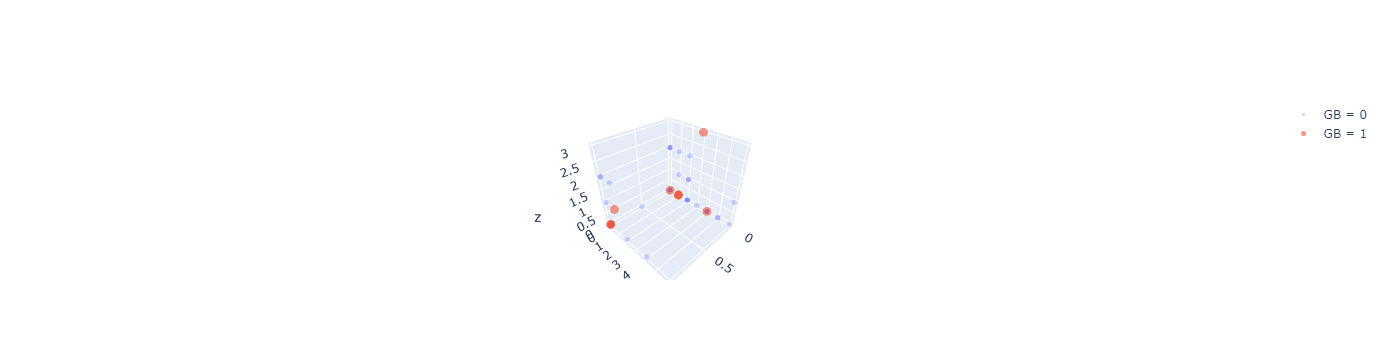

In [ ]:
plot_3d_df(df_SL)

In [ ]:
# plot_3d_df(df_bin_xyz)

### 3. continuous ==> categorical
___

#### > data generate

In [219]:
from sklearn.datasets import make_classification
# Generate Clean data
seed = 1224
X,gb = make_classification(n_samples=3000, n_features=3, n_informative=1,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.99,0.01], random_state=seed)
X = X+2

In [220]:
df_xyz = generate_3_dim_df(X,gb)
df_name = "Original continuous data"
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig = plot_3d_df_new(df_xyz)
fig.write_html(f"{path}/scatter distribution-data.html") 
fig

In [221]:
df = df_xyz
# df.loc[df[df.columns[-1]] == 1]['x'] 

In [222]:
degree = 45
radius = (np.pi/180) * degree
np.tan(radius)

0.9999999999999999

In [223]:
df.x = df.x + df.GB*(np.tan(radius)*df.y)
df.z = df.z + df.GB*(np.tan(radius)*df.y)
# df.z = df.GB*1 + df.z

In [224]:
df_name = "Original continuous data"
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig = plot_3d_df_new(df)
fig.write_html(f"{path}/scatter distribution-data.html") 
fig

In [532]:
df_conti = pd.DataFrame(X)
df_conti['GB'] = gb
df_conti

x         y         z  GB
0     3.124120 -0.007262  2.426779   0
1     0.543157  0.004971  2.765708   0
2     1.630677  0.514963  3.310341   0
3     2.567684 -0.810592  0.500091   0
4     3.442125 -0.398288  4.208119   0
...        ...       ...       ...  ..
2995  1.971486  0.227583  1.840748   0
2996  1.783972 -0.758179  1.571103   0
2997  1.410486 -0.856394  3.442568   0
2998  2.657775 -0.314046  0.048686   0
2999  2.477168 -0.061354  1.092254   0

[3000 rows x 4 columns]

In [225]:
# 6/15 new 
df_conti = df

In [226]:
df_dis_conti = cal_dis_cate(df_conti)

In [18]:
df_dis.to_csv(r'C:\Users\User\Desktop\Terry\Data\Distance\categorical dis\dis_conti.csv')  

NameError: name 'df_dis' is not defined

In [227]:
df = df_conti.iloc[:,:-1]
new_data = []
gap = [0]
n_feat = 0
feat_name= ['a','b','c']
label_encoder = LabelEncoder()
for c in df.columns:
    # print(c)
    mx = int(max(df[c]))+1
    mn = int(min(df[c]))-1

    n_bins = abs(mx-mn) 
    n_feat = n_feat+n_bins
    gap.append(n_feat)
    y = label_encoder.fit_transform(pd.cut(df[c], n_bins, retbins=True)[0])
    new_data.append(list(y))
    # print(y)

In [228]:
df_new = pd.DataFrame(new_data)
df = df_new.T

In [229]:
new_data = []
for r in df.values:
    l_1 = []
    nr_data = []
    for i in range(0,len(gap)-1):      
        l_1.append( gap[i]+r[i])
    # print(l_1)
    for i in range(0,gap[-1]): 
        if i in l_1:
            nr_data.append(1)
        else:
            nr_data.append(0)
    # print(nr_data)
    new_data.append(nr_data)
# new_data

In [230]:
n_f_name = []
cur = 0
s = 96
for i in range(0,gap[-1]):
    if i >= gap[cur]:
        cur = cur + 1
        s = s+1
    # print(chr(s), i-gap[cur-1])
    n_f_name.append(f"{chr(s)}-{i-gap[cur-1]}")

In [231]:
df_new = pd.DataFrame(new_data)
df_bin = df_new
df_bin.columns = n_f_name
df_bin['GB'] = gb
df_bin

a-0  a-1  a-2  a-3  a-4  a-5  a-6  a-7  a-8  a-9  ...  c-3  c-4  c-5  \
0       0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
1       0    0    0    0    1    0    0    0    0    0  ...    0    0    1   
2       0    0    0    1    0    0    0    0    0    0  ...    0    0    0   
3       0    0    0    1    0    0    0    0    0    0  ...    1    0    0   
4       0    0    0    0    0    1    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2995    0    0    0    0    0    1    0    0    0    0  ...    1    0    0   
2996    0    0    0    1    0    0    0    0    0    0  ...    1    0    0   
2997    0    0    0    1    0    0    0    0    0    0  ...    0    1    0   
2998    0    0    0    0    1    0    0    0    0    0  ...    1    0    0   
2999    0    0    0    0    1    0    0    0    0    0  ...    0    1    0   

      c-6  c-7  c-8  c-9  c-10  c-11  GB  
0       0    0    0    0     0     0   0  
1       0    0    0    0     0     0   0  
2       0    0    0    0     0     0   0  
3       0    0    0    0     0     0   0  
4       0    0    0    0     0     0   0  
...   ...  ...  ...  ...   ...   ...  ..  
2995    0    0    0    0     0     0   0  
2996    0    0    0    0     0     0   0  
2997    0    0    0    0     0     0   0  
2998    0    0    0    0     0     0   0  
2999    0    0    0    0     0     0   0  

[3000 rows x 34 columns]

In [232]:
df_dis_bin = cal_dis_cate(df_bin)
df_dis_bin

distance type
0        2.000000  0-0
1        2.449490  0-0
2        2.449490  0-0
3        1.414214  0-0
4        2.000000  0-0
...           ...  ...
4498495  2.000000  0-0
4498496  2.449490  0-0
4498497  2.000000  0-0
4498498  2.000000  0-0
4498499  2.000000  0-0

[4498500 rows x 2 columns]

In [247]:
df_dis.to_csv(r'C:\Users\User\Desktop\Terry\Data\Distance\categorical dis\dis_bin.csv')  

In [248]:
# df = df_bin
# df_name = "[Bin] Generated by continous data"
# get_des(df)
# fig = plot_corr_map(df,1000)
# fig.show()
# fig = plot_col_distri(df,7,4)
# fig.show()

# df_dis_bin = cal_dis(df, 1000, True)
# fig = plot_dis(df_dis, 1000, None )
# fig.show()

#### > dos encoding

In [233]:
sep_list = gap
new_col_name = feat_name

In [234]:
balance_list = cal_bal_list(df_bin.values)

##### >> SL

In [235]:
# df = df_SL
# df_name = "[Cate] Generated by continous data Dos SL"
# get_des(df)
# fig = plot_corr_map(df,500, df_name)
# fig.show()
# fig = col_distribution(df,2,2,df_name)
# fig.show()

# df_dis = cal_dis(df, 1000)
# fig = plot_dis(df_dis, 1000, df_name, "indianred" )
# fig.show()

In [236]:
sep_list

[0, 12, 21, 33]

In [237]:
df_SL = perform_encoding(df_bin,"SL")
df_SL['GB'] = df_bin['GB']
# get_des(df_SL)

In [238]:
# df_SL = perform_encoding(df_bin,"SL")

df_name = "[Cate] Continous data / Dos SL / [1~2^k]"
df_dis_SL_2pK = cal_dis_cate(df_SL)

In [239]:
df_SL_01 = rerange(df_SL, with_in_01 = True)

df_name = "[Cate] Continous data / Dos SL / [0~1]"
df_dis_SL_01 = cal_dis_cate(df_SL_01)

In [240]:
df_SL_r = rerange(df_SL, with_in_01 = False)

df_name = "[Cate] Continous data / Dos SL / [1~k]"
df_dis_SL_1k = cal_dis_cate(df_SL_r)

##### >> LS

In [241]:
# df = df_LS
# df_name = "[Cate] Generated by continous data Dos LS"
# get_des(df)
# fig = plot_corr_map(df,500, df_name)
# fig.show()
# fig = col_distribution(df,2,2,df_name)
# fig.show()

# df_dis = cal_dis(df, 1000)
# fig = plot_dis(df_dis, 1000, df_name, "hsl(120, 20%, 50%)" )
# fig.show()

In [242]:
df_LS = perform_encoding(df_bin,"LS")
df_LS['GB'] = df_bin['GB']
# df_LS

In [243]:
# df_SL = perform_encoding(df_bin,"SL")

df_name = "[Cate] Continous data / Dos SL / [1~2^k]"
df_dis_LS_2pK = cal_dis_cate(df_LS)

In [244]:
df_LS_01 = rerange(df_LS, with_in_01 = True)

df_name = "[Cate] Continous data / Dos SL / [0~1]"
df_dis_LS_01 = cal_dis_cate(df_LS_01)

In [245]:
df_LS_r = rerange(df_LS, with_in_01 = False)

df_name = "[Cate] Continous data / Dos SL / [1~k]"
df_dis_LS_1k = cal_dis_cate(df_LS_r)

#### > plot

##### >> 4 in 1 plot

In [246]:
df_name = "Continuous data/ Dos / [1~2^k]"
fig = plot_all_dis_conti(
    df_dis_bin.iloc[:,0].values, 
    df_dis_SL_2pK.iloc[:,0].values, 
    df_dis_LS_2pK.iloc[:,0].values, 
    df_dis_conti.iloc[:,0].values,
    10000,)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/{df_name.split('/')[0]}, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

In [247]:
df_name = "Continuous data / Dos / [0~1]"
fig = plot_all_dis_conti(
    df_dis_bin.iloc[:,0].values, 
    df_dis_SL_01.iloc[:,0].values, 
    df_dis_LS_01.iloc[:,0].values, 
    df_dis_conti.iloc[:,0].values,
    10000,)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/{df_name.split('/')[0]}, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

In [248]:
df_name = "Continuous data / Dos / [1~k]"
fig = plot_all_dis_conti(
    df_dis_bin.iloc[:,0].values, 
    df_dis_SL_1k.iloc[:,0].values, 
    df_dis_LS_1k.iloc[:,0].values, 
    df_dis_conti.iloc[:,0].values,
    10000,)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/{df_name.split('/')[0]}, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

##### >> 1 plot differences

In [249]:
df_name = "Continuous data / Dos SL / [1~2^k]"
df = df_dis_SL_2pK
fig = plot_cate_dis(df)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/dis cate, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

df_name = "Continuous data / Dos LS / [1~2^k]"
df = df_dis_LS_2pK
fig = plot_cate_dis(df)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/dis cate, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

In [250]:
df_name = "Continuous data / Dos SL / [0~1]"
df = df_dis_SL_01
fig = plot_cate_dis(df)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/dis cate, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

df_name = "Continuous data / Dos LS / [0~1]"
df = df_dis_LS_01
fig = plot_cate_dis(df)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/dis cate, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

In [251]:
df_name = "Continuous data / Dos SL / [0~k]"
df = df_dis_SL_1k
fig = plot_cate_dis(df)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/dis cate, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

df_name = "Continuous data / Dos LS / [0~k]"
df = df_dis_LS_1k
fig = plot_cate_dis(df)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/dis cate, {df_name.split('/')[1]}, {df_name.split('/')[2]}.html")  

In [252]:
df_name = "Continuous data / Bin"
df = df_dis_bin
fig = plot_cate_dis(df)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/dis cate , bin.html")  

df_name = "Continuous data / Original"
df = df_dis_conti
fig = plot_cate_dis(df)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/dis cate , ori.html")  

#### > TSNE, PCA, LDA

In [253]:
import plotly.express as px

def tsne(df):
    X = df.iloc[:, 0:len(df.columns)-1]
    y = df[df.columns[-1]]
    X_tsne = manifold.TSNE(n_components=3, init='random', random_state=seed, verbose=0).fit_transform(X) 
    df_xyz = generate_3_dim_df(X_tsne, y)
    return df_xyz

def plot_1d_array(df):
    fig = px.scatter(df, x="x", y="GB", color="GB", title=df_name, color_continuous_scale='Bluered')
    return fig
    
def generate_1d_df(X_new, y):
    df = pd.DataFrame(data=X_new, columns = ['x'])
    df['GB'] = y.values
    return df



def plot_3d_df_new(df):
    df1 = df.loc[df[df.columns[-1]] == 1]
    df0 = df.loc[df[df.columns[-1]] == 0]
    GB_1 = [go.Scatter3d(x=df1[df.columns[0]], y=df1[df.columns[1]], z=df1[df.columns[2]],mode='markers', marker=dict(size=3, color = "red", opacity=0.6), showlegend=True, name = "GB_1")]
    GB_0 = [go.Scatter3d(x=df0[df.columns[0]], y=df0[df.columns[1]], z=df0[df.columns[2]],mode='markers', marker=dict(size=3, color = "blue", opacity=0.6), showlegend=True, name = "GB_0")]
    
    fig = go.Figure(GB_1 + GB_0)
    # fig = go.Figure(data=data)
    fig.update_layout(title_text=" " , title_x=0.5)
    fig.update_layout( xaxis =  {'showgrid': False},yaxis = {'showgrid': True}, title_text=f'Scatter Distribution  <br><sup>{df_name}</sup> ',)
    # fig.show()
    return fig

##### >> tsne

In [254]:
df_bin_tsne = tsne(df_bin)

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [255]:
df_name = "Tsne dimension redutction"
fig = plot_3d_df_new(df_bin_tsne)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/scatter distribution-tsne.html")  

In [256]:
plot_3d_df_new(df_bin_tsne)

##### >> pca

In [257]:
df = df_bin
X_p = df.iloc[:, 0:len(df.columns)-1]
y_p=df[df.columns[-1]]
pca = PCA(n_components=3)
pca.fit(X_p)
X_pca = pca.transform(X_p)
print("original shape:   ", X_p.shape)
print("transformed shape:", X_pca.shape)

original shape:    (3000, 33)
transformed shape: (3000, 3)


In [258]:
df_pca = generate_3_dim_df(X_pca,y_p)

In [259]:
df_name = "PCA decomposition"
fig = plot_3d_df_new(df_pca)
path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/scatter distribution-PCA.html")  

In [260]:
df_bin.iloc[:,-1:].sum()

GB    30
dtype: int64

In [261]:
df = df_dis_conti
df.loc[df[df.columns[-1]] == "0-1"]

distance type
247      8.967587  0-1
459      9.052195  0-1
504      9.942456  0-1
527      8.357863  0-1
597      7.581777  0-1
...           ...  ...
4498417  8.356162  0-1
4498418  9.174215  0-1
4498419  9.146295  0-1
4498420  8.686967  0-1
4498421  9.103025  0-1

[89100 rows x 2 columns]

In [209]:
df_bin

a-0  a-1  a-2  a-3  a-4  a-5  a-6  a-7  a-8  a-9  ...  c-3  c-4  c-5  \
0       0    0    0    0    0    0    1    0    0    0  ...    0    1    0   
1       0    0    0    1    0    0    0    0    0    0  ...    0    1    0   
2       0    0    0    0    1    0    0    0    0    0  ...    0    0    1   
3       0    0    0    0    0    1    0    0    0    0  ...    0    0    0   
4       0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2995    0    0    0    0    1    0    0    0    0    0  ...    1    0    0   
2996    0    0    0    0    1    0    0    0    0    0  ...    1    0    0   
2997    0    0    0    0    1    0    0    0    0    0  ...    0    0    1   
2998    0    0    0    0    0    1    0    0    0    0  ...    0    0    0   
2999    0    0    0    0    0    1    0    0    0    0  ...    0    0    0   

      c-6  c-7  c-8  c-9  c-10  c-11  GB  
0       0    0    0    0     0     0   0  
1       0    0    0    0     0     0   0  
2       0    0    0    0     0     0   0  
3       0    0    0    0     0     0   0  
4       1    0    0    0     0     0   0  
...   ...  ...  ...  ...   ...   ...  ..  
2995    0    0    0    0     0     0   0  
2996    0    0    0    0     0     0   0  
2997    0    0    0    0     0     0   0  
2998    0    0    0    0     0     0   0  
2999    0    0    0    0     0     0   0  

[3000 rows x 34 columns]

##### >> lda

In [262]:
df = df_bin
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [263]:
LDA.explained_variance_ratio_
np.cumsum(LDA.explained_variance_ratio_)

array([1.])

In [264]:
lda = LinearDiscriminantAnalysis( n_components=1 )
lda.fit(X, y)
X_new = lda.transform(X)

In [265]:
df_lda = generate_1d_df(X_new,y)
df_name = "LDA"
fig = plot_1d_array(df_lda)

path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/1D classification, {df_name}.html")  

In [266]:
X_tsne = manifold.TSNE(n_components=1, init='random', random_state=seed, verbose=0).fit_transform(X) 
df_tsne = generate_1d_df(X_tsne,y)
df_name = "TSNE"
fig = plot_1d_array(df_tsne)

path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
fig.write_html(f"{path}/1D classification, {df_name}.html")  

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



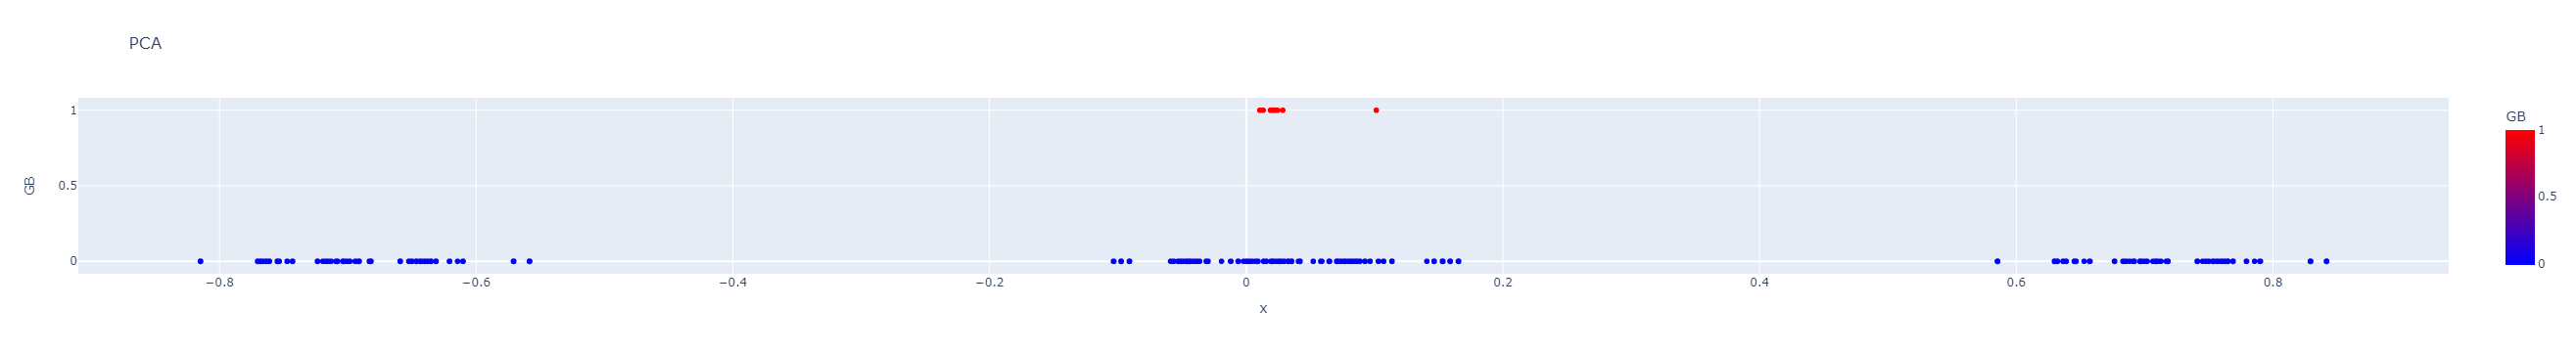

In [275]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
# X_new = pca.inverse_transform(X_pca)

df_pca = generate_1d_df(X_pca,y)
df_name = "PCA"
fig = plot_1d_array(df_pca)
fig
# path  = r"C:\Users\User\Desktop\Terry\Data\Output\3D Fig"
# fig.write_html(f"{path}/1D classification, {df_name}.html")  

In [268]:
specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],],


In [141]:
go.Scatter(x=df_lda["x"], y=df_lda["GB"])

Scatter({
    'x': array([-0.25701083, -0.24177042, -0.24721307, ..., -0.23065976, -0.0125363 ,
                -0.11823461]),
    'y': array([0, 0, 0, ..., 0, 0, 0])
})

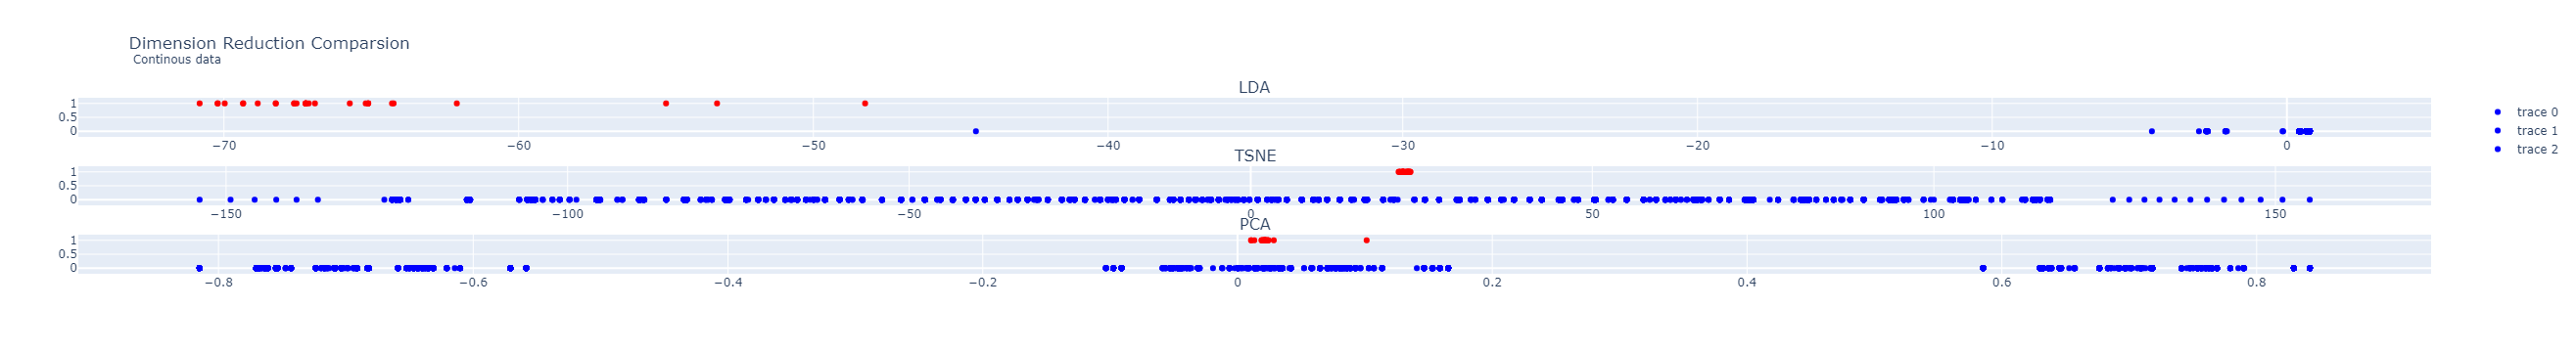

In [274]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

# Initialize figure with 4 3D subplots
fig = make_subplots(
        rows=3, cols=1,
        # specs=[[{}, None],
        #        [{}, None],
        #        [{}, None],],
        subplot_titles=(
            'LDA',
            'TSNE',
            'PCA',))
# adding surfaces to subplots.
fig.add_trace(
    go.Scatter(x=df_lda["x"], y=df_lda["GB"],marker=dict(color = GB, colorscale='Bluered',), mode='markers',),
    row=1, col=1)
    
fig.add_trace(
    go.Scatter(x=df_tsne["x"], y=df_tsne["GB"],marker=dict(color = GB, colorscale='Bluered',), mode='markers',),
    row=2, col=1)

fig.add_trace(
    go.Scatter(x=df_pca["x"], y=df_pca["GB"],marker=dict(color = GB, colorscale='Bluered',), mode='markers',),
    row=3, col=1)

fig.update_layout(
    title_text=f'Dimension Reduction Comparsion  <br><sup> Continous data </sup> ',
    # showlegend=True,
)

fig.show()
# fig.write_html(f"{path}/comparsion, reduction.html")  